In [7]:
%matplotlib inline
import math
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mapperAccuracyFile = "mapperAccuracy.txt"
kmerAccuracyPrefix = "kmerAccuracy"
timeMapperFile = "timerMapper.txt"
kmerSize = [21, 25, 27, 31]

###Read Accuracy into a dictionary

In [4]:
def readValue(fileName, flag = ''):
    mapValueDict = {}
    with open(fileName, 'r') as fileHandle:
        for line in fileHandle:
            #get name of mapper
            if flag == 'kmerFile':
                mapperName = len(mapValueDict)+1
            else:
                mapperName = line.strip().split("/")[-1].replace('.sam','')   

            #use temporary dictionary
            valueDict = {}

            #get total no. of reads
            line = fileHandle.next().strip()
            valueDict['reads'] = int(line.split("=")[-1])

            #get # of reads Aligned
            line = fileHandle.next().strip()
            valueDict['align'] = int(line.split("=")[-1])

            #get # of True positive
            line = fileHandle.next().strip()
            valueDict['tp'] = int(line.split("=")[-1])

            #get # of False positive
            line = fileHandle.next().strip()
            valueDict['fp'] = int(line.split("=")[-1])

            #get # of False negative
            line = fileHandle.next().strip()
            valueDict['fn'] = int(line.split("=")[-1])

            #get precision
            line = fileHandle.next().strip()
            valueDict['pre'] = float(line.split("=")[-1].replace('%',''))

            #get recall
            line = fileHandle.next().strip()
            valueDict['recall'] = float(line.split("=")[-1].replace('%',''))

            #ignore true positve % since same as precision
            line = fileHandle.next().strip()

            #get FDR %
            line = fileHandle.next().strip()
            valueDict['fdr'] = float(line.split("=")[-1].replace('%',''))

            #get f1 %
            line = fileHandle.next().strip()
            valueDict['f1'] = float(line.split("=")[-1].replace('%',''))

            #get avg hits per read

            line = fileHandle.next().strip()
            valueDict['hpr'] = float(line.split("=")[-1].replace('%',''))

            mapValueDict[mapperName] = valueDict

        return mapValueDict

###Mapper-Accuracy plot

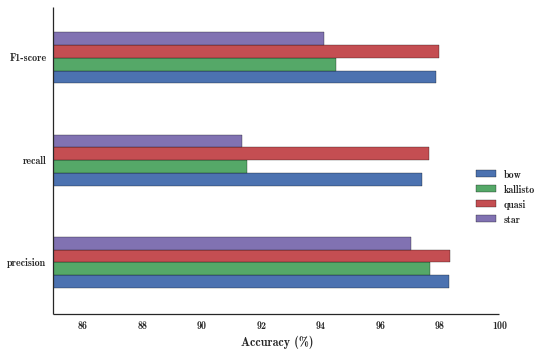

In [66]:
sns.set_style("white")

mapValueDict = readValue(mapperAccuracyFile)
mvd = pd.DataFrame(mapValueDict)

mvd.loc['precision'] = mvd.loc['pre']
mvd.loc['F1-score'] = mvd.loc['f1']

mvd.loc[['precision', 'recall', 'F1-score']].plot(kind='barh', grid=False).legend(bbox_to_anchor=(1.1, 0.5))
plt.xlim(85,100)
sns.despine()
plt.xlabel('Accuracy (%)', fontsize='large')

In [75]:
mvd

,bow,kallisto,quasi,star
align,47579567.00,44774502.00,47677356.00,44711604.00
f1,97.86,94.50,97.98,94.10
fdr,1.69,2.33,1.65,2.98
fn,1241778.00,4046843.00,1143989.00,4109741.00
fp,805965.00,1042167.00,785845.00,1330181.00
hpr,0.00,5.30,4.30,3.80
pre,98.31,97.67,98.35,97.02
reads,48821345.00,48821345.00,48821345.00,48821345.00
recall,97.41,91.53,97.62,91.35
tp,46773603.00,43732336.00,46891512.00,43381424.00


###kmer-Accuracy plot

#F1-score

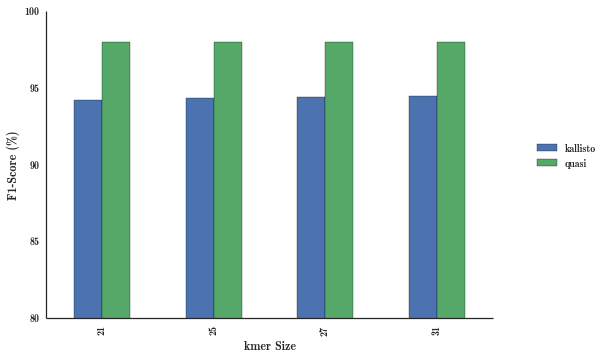

In [7]:
sns.set_style("white")

kmerValueDict = {}
for kmer in kmerSize:
    kmerValueDict[kmer] = readValue(kmerAccuracyPrefix+str(kmer)+".txt", 'kmerFile')

plotDict = {'quasi' : {}, 'kallisto' : {}}
kmer = []

for kmer in kmerSize:
    for id in [1, 2]:
        if id == 1:
            plotDict['quasi'][kmer] = kmerValueDict[kmer][id]['f1']
        else:
            plotDict['kallisto'][kmer] =  kmerValueDict[kmer][id]['f1']
       
mvd = pd.DataFrame(plotDict)
mvd.loc[[21, 25, 27, 31]].plot(kind='bar', grid=False).legend(bbox_to_anchor=(1.25, 0.6))
plt.ylim(80,100)
sns.despine()
plt.xlabel('kmer Size', fontsize='large')
plt.ylabel('F1-Score (%)', fontsize='large')

In [8]:
mvd

,kallisto,quasi
21,94.20,97.99
25,94.36,98.02
27,94.42,98.02
31,94.50,97.98


#hits/read

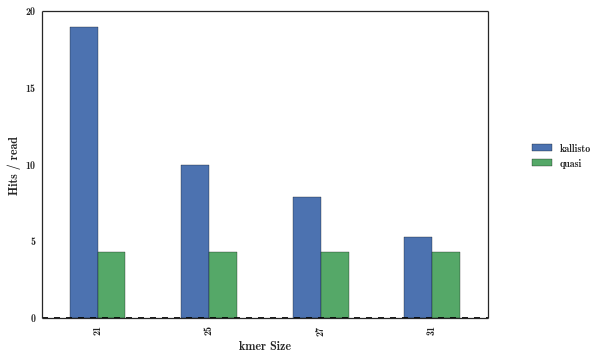

In [6]:
sns.set_style("white")

kmerValueDict = {}
for kmer in kmerSize:
    kmerValueDict[kmer] = readValue(kmerAccuracyPrefix+str(kmer)+".txt", 'kmerFile')

plotDict = {'quasi' : {}, 'kallisto' : {}}
kmer = []

for kmer in kmerSize:
    for id in [1, 2]:
        if id == 1:
            plotDict['quasi'][kmer] = kmerValueDict[kmer][id]['hpr']
        else:
            plotDict['kallisto'][kmer] =  kmerValueDict[kmer][id]['hpr']
       
mvd = pd.DataFrame(plotDict)
mvd.loc[[21, 25, 27, 31]].plot(kind='bar', grid=False).legend(bbox_to_anchor=(1.25, 0.6))
plt.xlabel('kmer Size', fontsize='large')
plt.ylabel('Hits / read', fontsize='large')

#Recall

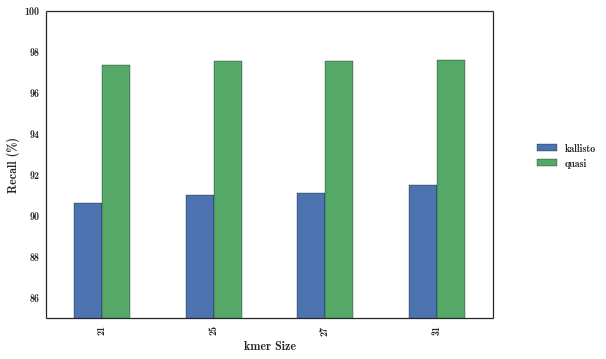

In [7]:
sns.set_style("white")

kmerValueDict = {}
for kmer in kmerSize:
    kmerValueDict[kmer] = readValue(kmerAccuracyPrefix+str(kmer)+".txt", 'kmerFile')

plotDict = {'quasi' : {}, 'kallisto' : {}}
kmer = []

for kmer in kmerSize:
    for id in [1, 2]:
        if id == 1:
            plotDict['quasi'][kmer] = kmerValueDict[kmer][id]['recall']
        else:
            plotDict['kallisto'][kmer] =  kmerValueDict[kmer][id]['recall']
       
mvd = pd.DataFrame(plotDict)
mvd.loc[[21, 25, 27, 31]].plot(kind='bar', grid=False).legend(bbox_to_anchor=(1.25, 0.6))
plt.ylim(85,100)
plt.xlabel('kmer Size', fontsize='large')
plt.ylabel('Recall (%)', fontsize='large')

In [8]:
mvd

,kallisto,quasi
21,90.63,97.38
25,91.01,97.60
27,91.15,97.57
31,91.53,97.62


#Time-Mapper Plot

In [9]:
timeDict = {}
memDict = {}
from __future__ import print_function
with open(timeMapperFile, 'r') as fileHandle:
    for line in fileHandle:
        mapperName = line.strip().replace('_48M','')
        line = fileHandle.next().strip().split(',')
        if len(line[0].split(':')) == 2:
            timeDict[mapperName] = "{0:.2f}".format(float(line[0].split(':')[0]) + (float(line[0].split(':')[1]) / 60))
        elif len(line[0].split(':')) == 3:
            timeDict[mapperName] = "{0:.2f}".format(float(line[0].split(':')[0])*60 + (float(line[0].split(':')[1])) + (float(line[0].split(':')[1]) / 60))
        memDict[mapperName] = line[1]
        
print (timeDict)
print (memDict)


{'quasi_10': '2.59', 'bowtie2_10': '421.02', 'star_1': '132.20', 'quasi_8': '3.40', 'star_10': '16.77', 'quasi_1': '10.37', 'quasi_2': '6.27', 'quasi_4': '4.39'}
{'quasi_10': ' 5201588', 'bowtie2_10': ' 922404', 'star_1': ' 3630760', 'quasi_8': ' 5194372', 'star_10': ' 5023836', 'quasi_1': ' 5170608', 'quasi_2': ' 5173596', 'quasi_4': ' 5181304'}


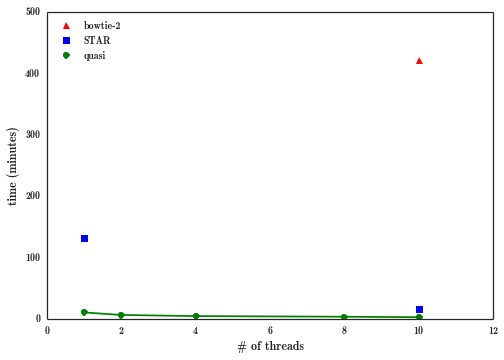

In [10]:
#Time/Thread Graph
threads = [1, 2, 4, 8, 10]

axes = plt.gca()
axes.set_xlim([0, 12])
axes.set_ylim([0,500])
plt.ylabel('time (minutes)', fontsize= 'large' )
plt.xlabel('# of threads', fontsize= 'large' )

quasiVal = [timeDict['quasi_1'], timeDict['quasi_2'], timeDict['quasi_4'], timeDict['quasi_8'], timeDict['quasi_10']]
starVal = [timeDict['star_10'], timeDict['star_1']]

bow, = plt.plot(threads[-1], timeDict['bowtie2_10'], 'r^')
STAR, = plt.plot([threads[-1], threads[0]], starVal, 'bs')
quasi = plt.plot(threads, quasiVal, 'g-', threads, quasiVal, 'go')

plt.legend([bow, STAR, quasi[1]], ["bowtie-2", "STAR", "quasi"], loc = 2)
plt.show()

In [11]:
timeDict

{'bowtie2_10': '421.02',
 'quasi_1': '10.37',
 'quasi_10': '2.59',
 'quasi_2': '6.27',
 'quasi_4': '4.39',
 'quasi_8': '3.40',
 'star_1': '132.20',
 'star_10': '16.77'}

###Real Data Venn plot

In [8]:
fileName = "venStatsOld.txt"
cap = []

with open(fileName, 'r') as fileHandle:
    data = fileHandle.readlines()
# i=0
# for l in data:
#     print i, l
#     i += 1
n1 = int(data[7].strip())
n2 = int(data[8].strip())
n3 = int(data[9].strip())
n4 = int(data[10].strip())

cap.append(int(data[14].strip()))
n12 = int(data[17].strip().replace("(", '').replace(")", '').split(',')[0])

cap.append(int(data[19].strip()))
n13 = int(data[22].strip().replace("(", '').replace(")", '').split(',')[0])

cap.append(int(data[24].strip()))
n14 = int(data[27].strip().replace("(", '').replace(")", '').split(',')[0])

cap.append(int(data[29].strip()))
n23 = int(data[31].strip().replace("(", '').replace(")", '').split(',')[0])
    
cap.append(int(data[33].strip()))
n24 = int(data[36].strip().replace("(", '').replace(")", '').split(',')[0])

cap.append(int(data[38].strip()))
n34 = int(data[41].strip().replace("(", '').replace(")", '').split(',')[0])

# cap.append(int(data[153].strip()))
n123 = int(data[45].strip().replace("(", '').replace(")", '').split(',')[0])

# cap.append(int(data[177].strip()))
n124 = int(data[49].strip().replace("(", '').replace(")", '').split(',')[0])

# cap.append(int(data[200].strip()))
n134 = int(data[54].strip().replace("(", '').replace(")", '').split(',')[0])

# cap.append(int(data[223].strip()))
n234 = int(data[58].strip().replace("(", '').replace(")", '').split(',')[0])

# cap.append(int(data[246].strip()))
n1234 = int(data[62].strip().replace("(", '').replace(")", '').split(',')[0])

([<matplotlib.axis.XTick at 0x7f9f88bf3f50>,
 <a list of 15 Text xticklabel objects>)

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=small. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


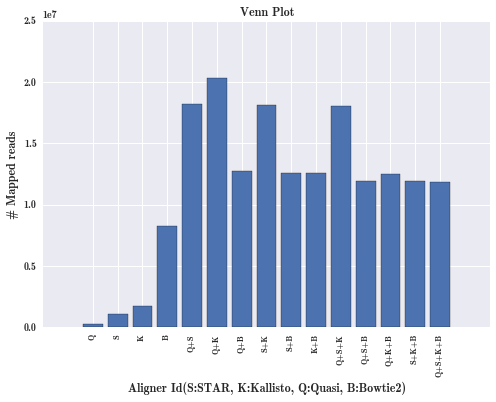

In [11]:
r9 = n1234

r5  =  n123 - r9
r8  =  n234 - r9
r10 =  n124 - r9
r13 =  n134 - r9

r2  =   n13 - (r5 + r9 + r13)
r11 =   n24 - (r8 + r9 + r10)
r12 =   n34 - (r8 + r9 + r13)
r4  =   n23 - (r5 + r8 + r9)
r14 =   n14 - (r9 + r10 + r13)
r6  =   n12 - (r9 + r10 + r5)

r1  = n3 - (r2 + r4 + r5 + r8 + r9 + r12 + r13)
r3  = n1 - (r2 + r5 + r6 + r10 + r9 + r13 + r14)
r7  = n2 - (r4 + r5 + r6 + r8 + r9 + r10 + r11)
r15 = n4 - (r8 + r9 + r10 + r11 + r12 + r13 + r14)

plt.ylabel('# Mapped reads', fontsize= 'large' )
plt.xlabel('Aligner Id(S:STAR, K:Kallisto, Q:Quasi, B:Bowtie2)', fontsize= 'large' )

plt.title('Venn Plot', fontsize= 'large' )

val = [r1, r3, r7, r15, n12, n13, n14, n23, n24, n34, n123, n124, n134, n234, n1234]
# errCap = [cap[id-4]-val[id] for id in range(4, 15)]

plt.bar(range(15), val, align='center')
# plt.bar(range(4, 15), errCap, bottom=val[4:15], color='r', align='center')
plt.xticks(range(15), ['Q', 'S', 'K', 'B', 'Q+S', 'Q+K', 'Q+B', 'S+K', 'S+B', 'K+B', 'Q+S+K', 'Q+S+B', 'Q+K+B', 'S+K+B', 'Q+S+K+B' ], size='small', rotation=90)


In [12]:
val

[254473,
 1115342,
 1725207,
 8284237,
 18231592,
 20309568,
 12772979,
 18160395,
 12603191,
 12570847,
 18020062,
 11909020,
 12477319,
 11895717,
 11821241]

In [9]:
for i in val:
    print str(i) + '\t',

7757	247461	655983	12078	20442359	20691667	20072268	19733999	19937434	19565035	19681210	19276166	19551862	18941764	18899804	